In [14]:
# !pip install torch


In [11]:
import torch
print(torch.__version__)


2.4.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import glob
from torch.utils.data import Dataset, DataLoader

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

# Load the Data set

Data set link is: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection?resource=download

In [3]:
# Loading the Yes Tumor data

tumor = []
path = './MRI_DATA/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))  # resize the images
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

In [4]:
len(tumor)

154

In [5]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [6]:
# Loading the No tumor data

healthy= []
path = './MRI_DATA/brain_tumor_dataset/no/*.jpg'

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [7]:
len(healthy)

91

In [42]:
91+91

182

In [8]:
# for img in health:
#     print(img.shape)

# Convert into Nnmpy array

In [9]:
healthy = np.array(healthy)
tumor = np.array(tumor)

In [10]:
tumor.shape

(154, 128, 128, 3)

154 data , 128 height, 128 weidth, 3 channels or color

In [11]:
154+91

245

In [12]:
ALL= np.concatenate((healthy,tumor))

In [37]:
ALL.shape

(245, 128, 128, 3)

In [38]:
healthy.shape

(91, 128, 128, 3)

In [17]:
healthy.shape[0]

91

In [19]:
healthy.shape[1]

128

# Visualize the Brain MRI DATA

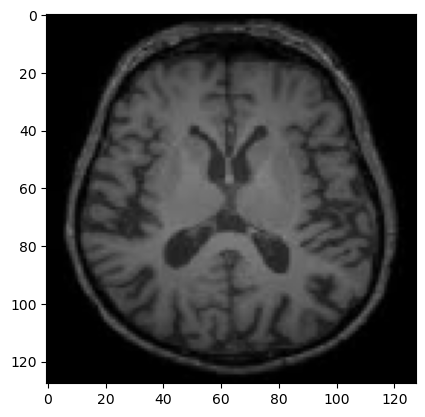

In [20]:
plt.imshow(healthy[0])

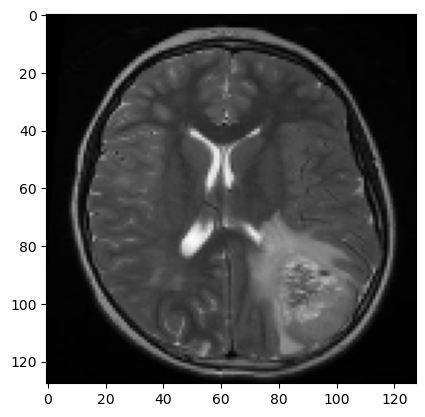

In [21]:
plt.imshow(tumor[2])

In [23]:
def plot_random (healty, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace = False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("healthy brain")
        plt.imshow(healthy_imgs[i])
        
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("tumor brain")
        plt.imshow(tumor_imgs[i])    

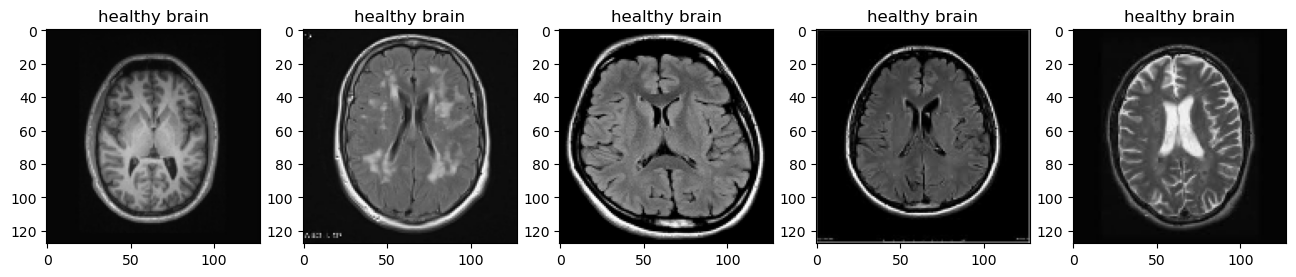

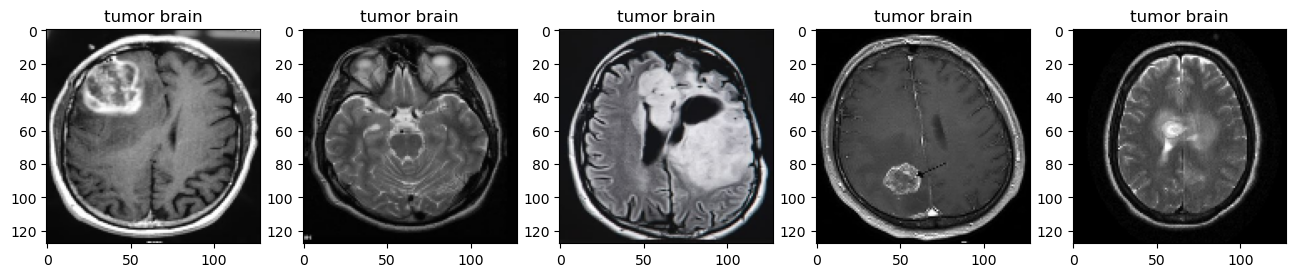

In [24]:
plot_random(healthy, tumor)

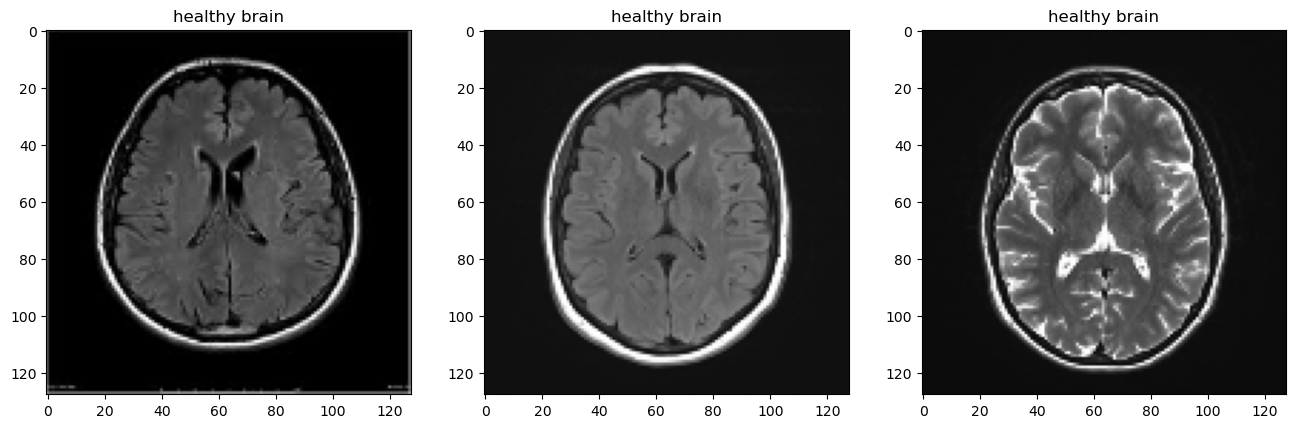

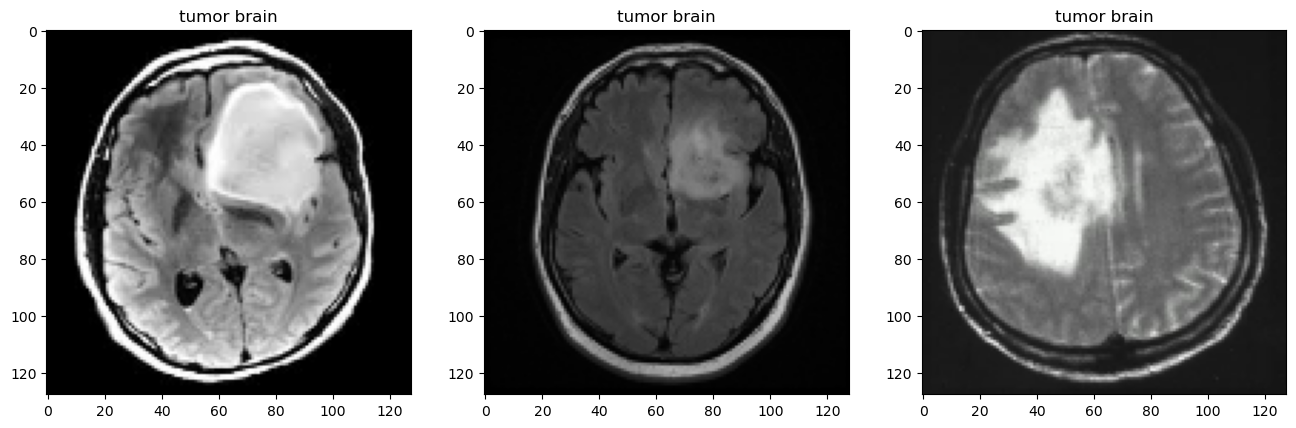

In [25]:
plot_random(healthy, tumor,num=3)

# Creat Torch Dataset Class

what is pytorch abstract dataset class

In [26]:
class Dataset(object):
    
    def __getitem__(self,index):
        raise NotImplementedError
        
    def __len__(self):
        raise NotImplementedError
        
    def __add__(self,other):
        return ConcatDataset([self,other])

In [27]:
class MRI(Dataset):
    def __init__(self,scores):
        self.x= scores
        
    def __getitem__(self,index):
        return self.x[index]

In [28]:
s= [1,2,3,4]
d= MRI(s)

In [29]:
d.x

[1, 2, 3, 4]

In [30]:
d[2]

3

# Creating MRI dataset class

In [43]:
class MRI(Dataset):
    def __init__(self):
        
        tumor= []
        healthy= []
        
        for f in glob.iglob('./MRI_DATA/brain_tumor_dataset/yes/*.jpg'):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128))  # resize the images
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            tumor.append(img)
            
        for f in glob.iglob('./MRI_DATA/brain_tumor_dataset/no/*.jpg'):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            healthy.append(img)
            
        # our images
        tumor = np.array(tumor,dtype= np.float32)
        healthy = np.array(healthy,dtype= np.float32)
        
        # Labels
        tumor_label = np.ones(tumor.shape[0], dtype= np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype= np.float32)
        
        # concatenates 
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))
        
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self,index):
        sample = {'image':self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images= self.images/255.0

In [44]:
mri=MRI()

In [45]:
len(mri)

245

In [47]:
img= mri[5]['image']

In [48]:
img.shape

(3, 128, 128)

# Creat the model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn.model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5)
        )
        
        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1)
        )
        
    def forward(self, x):
        x= self.cnn_model(x)
        x= x.view(x.size(0), -1)
        x= self.fc_model(x)
        x= F.sigmoid(x)
        
        return x